In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

### Загрузка данных и построение профилей пользователей

In [2]:
costs = pd.read_excel('costs_.xlsx')
costs['costs'] = pd.to_numeric(costs['costs'], errors= 'coerce')
costs

,dt,channel,costs
0,2020-04-01,GameAds,10.325
1,2020-04-02,GameAds,9.030
2,2020-04-03,GameAds,11.690
3,2020-04-04,GameAds,12.040
4,2020-04-05,GameAds,10.465
...,...,...,...
359,2020-06-26,JetAds,21.750
360,2020-06-27,JetAds,24.750
361,2020-06-28,JetAds,24.600
362,2020-06-29,JetAds,25.650


In [3]:
purchases = pd.read_excel('purchases_.xlsx')
purchases['event_dt'] = pd.to_datetime(purchases['event_dt']).dt.date
purchases['revenue'] = pd.to_numeric(purchases['revenue'], errors = 'coerce')
purchases

,user_id,event_dt,revenue,item
0,df0f3327-381,2020-04-01,1.0,10 золотых монет
1,df0f3327-381,2020-04-02,1.0,10 золотых монет
2,241cb8694b53,2020-04-02,1.0,10 золотых монет
3,0c9453440c85,2020-04-02,1.0,10 золотых монет
4,96-4377d99ca,2020-04-02,1.0,10 золотых монет
...,...,...,...,...
6884,9cd8aa06b00b,2020-06-30,1.0,10 золотых монет
6885,-f-dbaa-52f0,2020-06-30,1.0,10 золотых монет
6886,50d0c5-63801,2020-06-30,1.0,10 золотых монет
6887,109af6_d505-,2020-06-30,1.0,10 золотых монет


In [4]:
session = pd.read_excel('sessions_.xlsx')
session['session_start'] = pd.to_datetime(session['session_start']).dt.date
session['session_duration'] = pd.to_numeric(session['session_duration'], errors = 'coerce')
session

,user_id,region,device,channel,session_duration,session_start
0,d35ad20dd45d,SEA,iPhone,GameAds,2589.186227,2020-04-01
1,ac4a113c52c_,CIS,iPhone,GameAds,1467.539334,2020-04-01
2,d0337d117cc8,CIS,iPhone,GameAds,3777.737508,2020-04-01
3,2f8c_262-_85,North America,iPhone,GameAds,3755.966201,2020-04-01
4,4b1-114-4692,Europe,iPhone,GameAds,2898.802314,2020-04-01
...,...,...,...,...,...,...
167885,f4436b_52dc_,CIS,Andoroid,BrainPlus,2775.695988,2020-06-30
167886,ad3-bc75a9fc,Europe,Andoroid,JetAds,1885.137209,2020-06-30
167887,a08d5af97-3d,Europe,Andoroid,BrainPlus,157.472441,2020-06-30
167888,-9_13acb52-7,Africa,Andoroid,BrainPlus,151.266928,2020-06-30


In [5]:
# профиль пользовтелей
profile = session.sort_values(by = ['user_id', 'session_start']).groupby('user_id').agg({'region': 'first', 'device': 'first',
                                                                                        'channel': 'first', 'session_start': 'first'})
profile = profile.rename(columns = {'session_start': 'first_date'})
profile = profile.reset_index()
profile['payer'] = profile['user_id'].isin(purchases['user_id'].unique())
profile

,user_id,region,device,channel,first_date,payer
0,----a1283_6_,South America,Andoroid,JetAds,2020-06-23,False
1,---0f3689-06,Africa,Andoroid,BrainPlus,2020-04-14,False
2,---23ca-3f53,SEA,Andoroid,BrainPlus,2020-05-18,False
3,---23f6c-3b2,CN,Andoroid,BrainPlus,2020-05-11,False
4,---2ab5c35c6,SEA,Andoroid,BrainPlus,2020-06-21,False
...,...,...,...,...,...,...
83180,fff9b9683358,Europe,iPhone,GameAds,2020-05-20,False
83181,fffa52af06d-,Europe,Andoroid,BrainPlus,2020-06-19,False
83182,fffa9419ccf6,South America,Andoroid,BrainPlus,2020-06-06,False
83183,fffbf373cc64,North America,iPhone,GameAds,2020-04-20,False


In [6]:
# профили платящих пользователи
report = profile.groupby('payer').agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'})
report['%'] = report['unique_users'] / report['unique_users'].sum() # доля платящих пользователей
report.sort_values(by = 'unique_users', ascending = False).style.format({'%' : '{:.2%}'})

,unique_users,%
payer,,
False,81800,98.34%
True,1385,1.66%


In [7]:
# пользователи по географическим регионам:
report = profile.groupby('region').agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
report['%'] = report['cohort_size'] / report['cohort_size'].sum()
report.sort_values(by = 'cohort_size', ascending = False).style.format({'%': '{:.2%}'})

,cohort_size,%
region,,
CN,16314,19.61%
North America,14124,16.98%
CIS,12943,15.56%
Europe,11566,13.90%
South America,9835,11.82%
Africa,7490,9.00%
SEA,6223,7.48%
Australia,4690,5.64%


In [8]:
# пользователи по device:
report = profile.groupby('device').agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
report['%'] = report['cohort_size'] / report['cohort_size'].sum()
report.style.format({'%': '{:.2%}'})

,cohort_size,%
device,,
Andoroid,58216,69.98%
iPhone,24969,30.02%


In [9]:
# пользователи по channel:
report = profile.groupby('channel').agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
report['%'] = report['cohort_size'] / report['cohort_size'].sum()
report.style.format({'%': '{:.2%}'})

,cohort_size,%
channel,,
BrainPlus,45885,55.16%
GameAds,19733,23.72%
JetAds,12331,14.82%
SenseAds,5236,6.29%


Доля платящих пользователей очень мала и составляет всего 0,016 % от общей доли пользователей. CN, North America, CIS три самых больших региона пользователей. Пользователей с android больше чем пользователей с iphone в два раза и даже больше. Самый популярный канал для привлечения пользоватлей - это 'BrainPlus'

### Рассчитаю удержание
#### Рассчитаю удержание 14-го дня с разбивкой на платящих и неплатящих пользователей. Построю таблицу удержания. Построю график удержания.

In [10]:
# Retention
retention_raw = profile.merge(session[['user_id', 'session_start']], on='user_id', how = 'left')
retention_raw['age'] = (retention_raw['session_start'] - retention_raw['first_date']).dt.days
retention_raw

,user_id,region,device,channel,first_date,payer,session_start,age
0,----a1283_6_,South America,Andoroid,JetAds,2020-06-23,False,2020-06-23,0
1,---0f3689-06,Africa,Andoroid,BrainPlus,2020-04-14,False,2020-04-14,0
2,---0f3689-06,Africa,Andoroid,BrainPlus,2020-04-14,False,2020-04-15,1
3,---0f3689-06,Africa,Andoroid,BrainPlus,2020-04-14,False,2020-04-17,3
4,---0f3689-06,Africa,Andoroid,BrainPlus,2020-04-14,False,2020-04-19,5
...,...,...,...,...,...,...,...,...
167885,fffa52af06d-,Europe,Andoroid,BrainPlus,2020-06-19,False,2020-06-19,0
167886,fffa9419ccf6,South America,Andoroid,BrainPlus,2020-06-06,False,2020-06-06,0
167887,fffbf373cc64,North America,iPhone,GameAds,2020-04-20,False,2020-04-20,0
167888,fffcc8249f_4,SEA,iPhone,GameAds,2020-04-09,False,2020-04-09,0


In [11]:
retention = retention_raw.query('age <= 13').pivot_table(index = 'payer', columns = 'age', values = 'user_id', aggfunc = 'nunique').fillna(0)
retention

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,
False,81800,23112,11059,6767,4639,3477,2577,2087,1701,1394,1257,1052,935,786
True,1385,946,771,650,592,525,431,448,401,356,340,352,313,329


In [12]:
retention = retention.div(retention[0], axis = 0)
retention.style.format('{:.2%}')

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,
False,100.00%,28.25%,13.52%,8.27%,5.67%,4.25%,3.15%,2.55%,2.08%,1.70%,1.54%,1.29%,1.14%,0.96%
True,100.00%,68.30%,55.67%,46.93%,42.74%,37.91%,31.12%,32.35%,28.95%,25.70%,24.55%,25.42%,22.60%,23.75%


age,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,
False,28.25%,13.52%,8.27%,5.67%,4.25%,3.15%,2.55%,2.08%,1.70%,1.54%,1.29%,1.14%,0.96%
True,68.30%,55.67%,46.93%,42.74%,37.91%,31.12%,32.35%,28.95%,25.70%,24.55%,25.42%,22.60%,23.75%


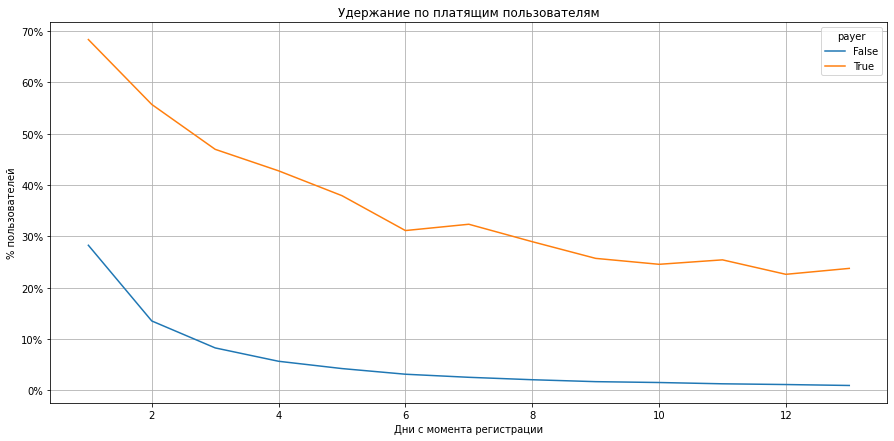

In [13]:
# график
schedule = retention.drop(columns = [0])
display(schedule.style.format('{:.2%}'))
ax = schedule.T.plot(figsize=(15,7), grid = True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('Удержание по платящим пользователям'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('% пользователей');

In [14]:
retention_reg = retention_raw.query('age <= 13').pivot_table(index = 'region', columns = 'age', values = 'user_id', aggfunc = 'nunique').fillna(0)
retention_reg = retention_reg.div(retention_reg[0], axis = 0)
retention_reg.style.format('{:.2%}')

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
region,,,,,,,,,,,,,,
Africa,100.00%,28.48%,14.21%,9.39%,6.40%,4.82%,3.38%,3.12%,2.42%,2.27%,1.90%,1.82%,1.64%,1.20%
Australia,100.00%,29.55%,13.88%,9.17%,6.59%,5.10%,3.58%,3.18%,2.32%,2.15%,1.88%,1.36%,1.43%,1.36%
CIS,100.00%,29.21%,13.94%,9.34%,6.68%,4.75%,3.63%,2.93%,2.57%,2.10%,1.87%,1.78%,1.48%,1.41%
CN,100.00%,28.89%,14.78%,8.92%,6.44%,5.06%,3.63%,3.03%,2.57%,2.15%,2.06%,1.63%,1.59%,1.32%
Europe,100.00%,28.76%,13.92%,8.70%,6.21%,4.75%,3.66%,3.32%,2.79%,2.08%,1.97%,1.60%,1.53%,1.51%
North America,100.00%,28.77%,13.74%,8.51%,6.15%,4.69%,3.47%,3.06%,2.42%,2.09%,1.80%,1.76%,1.42%,1.25%
SEA,100.00%,28.54%,14.43%,8.66%,5.75%,4.98%,3.60%,2.35%,2.67%,1.98%,1.77%,1.66%,1.35%,1.33%
South America,100.00%,29.27%,14.76%,8.87%,5.92%,4.46%,3.93%,3.22%,2.33%,2.00%,2.00%,1.73%,1.48%,1.30%


age,1,2,3,4,5,6,7,8,9,10,11,12,13
region,,,,,,,,,,,,,
Africa,28.48%,14.21%,9.39%,6.40%,4.82%,3.38%,3.12%,2.42%,2.27%,1.90%,1.82%,1.64%,1.20%
Australia,29.55%,13.88%,9.17%,6.59%,5.10%,3.58%,3.18%,2.32%,2.15%,1.88%,1.36%,1.43%,1.36%
CIS,29.21%,13.94%,9.34%,6.68%,4.75%,3.63%,2.93%,2.57%,2.10%,1.87%,1.78%,1.48%,1.41%
CN,28.89%,14.78%,8.92%,6.44%,5.06%,3.63%,3.03%,2.57%,2.15%,2.06%,1.63%,1.59%,1.32%
Europe,28.76%,13.92%,8.70%,6.21%,4.75%,3.66%,3.32%,2.79%,2.08%,1.97%,1.60%,1.53%,1.51%
North America,28.77%,13.74%,8.51%,6.15%,4.69%,3.47%,3.06%,2.42%,2.09%,1.80%,1.76%,1.42%,1.25%
SEA,28.54%,14.43%,8.66%,5.75%,4.98%,3.60%,2.35%,2.67%,1.98%,1.77%,1.66%,1.35%,1.33%
South America,29.27%,14.76%,8.87%,5.92%,4.46%,3.93%,3.22%,2.33%,2.00%,2.00%,1.73%,1.48%,1.30%


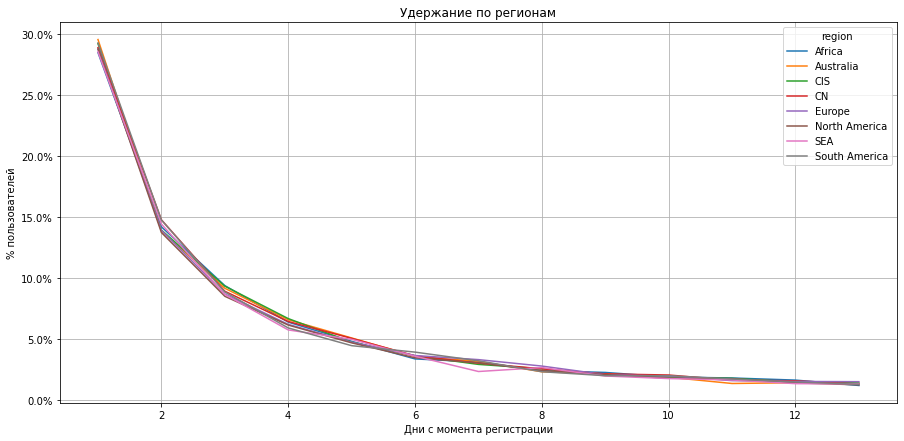

In [15]:
schedule = retention_reg.drop(columns = [0])
display(schedule.style.format('{:.2%}'))
ax = schedule.T.plot(figsize=(15,7), grid=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('Удержание по регионам'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('% пользователей');

In [16]:
retention_device = retention_raw.query('age <= 13').pivot_table(index = 'device', columns = 'age', values = 'user_id', aggfunc = 'nunique').fillna(0)
retention_device = retention_device.div(retention_device[0], axis = 0)
retention_device.style.format('{:.2%}')

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
device,,,,,,,,,,,,,,
Andoroid,100.00%,28.92%,14.20%,8.82%,6.17%,4.76%,3.54%,2.93%,2.45%,1.99%,1.87%,1.61%,1.49%,1.33%
iPhone,100.00%,28.92%,14.28%,9.13%,6.56%,4.92%,3.80%,3.33%,2.72%,2.37%,2.05%,1.87%,1.53%,1.36%


age,1,2,3,4,5,6,7,8,9,10,11,12,13
device,,,,,,,,,,,,,
Andoroid,28.92%,14.20%,8.82%,6.17%,4.76%,3.54%,2.93%,2.45%,1.99%,1.87%,1.61%,1.49%,1.33%
iPhone,28.92%,14.28%,9.13%,6.56%,4.92%,3.80%,3.33%,2.72%,2.37%,2.05%,1.87%,1.53%,1.36%


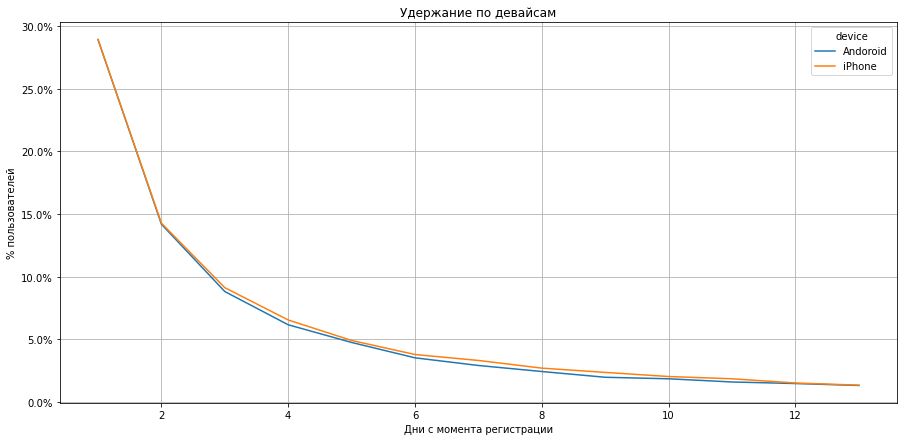

In [17]:
schedule = retention_device.drop(columns = [0])
display(schedule.style.format('{:.2%}'))
ax = schedule.T.plot(figsize=(15,7), grid=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('Удержание по девайсам'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('% пользователей');

In [18]:
retention_channel = retention_raw.query('age <= 13').pivot_table(index = 'channel', columns = 'age', values = 'user_id', aggfunc = 'nunique').fillna(0)
retention_channel = retention_channel.div(retention_channel[0], axis = 0)
retention_channel.style.format('{:.2%}')

age,0,1,2,3,4,5,6,7,8,9,10,11,12,13
channel,,,,,,,,,,,,,,
BrainPlus,100.00%,25.54%,11.24%,6.54%,4.26%,3.09%,2.21%,1.70%,1.39%,1.08%,0.93%,0.84%,0.78%,0.66%
GameAds,100.00%,25.49%,11.47%,7.07%,4.70%,3.41%,2.48%,2.19%,1.59%,1.43%,1.23%,1.14%,0.85%,0.82%
JetAds,100.00%,41.49%,25.20%,17.33%,13.29%,10.97%,8.46%,7.51%,6.38%,5.35%,5.34%,4.48%,4.10%,3.84%
SenseAds,100.00%,41.84%,24.87%,16.88%,13.54%,10.64%,8.79%,7.62%,6.97%,5.92%,5.14%,4.62%,4.09%,3.40%


age,1,2,3,4,5,6,7,8,9,10,11,12,13
channel,,,,,,,,,,,,,
BrainPlus,25.54%,11.24%,6.54%,4.26%,3.09%,2.21%,1.70%,1.39%,1.08%,0.93%,0.84%,0.78%,0.66%
GameAds,25.49%,11.47%,7.07%,4.70%,3.41%,2.48%,2.19%,1.59%,1.43%,1.23%,1.14%,0.85%,0.82%
JetAds,41.49%,25.20%,17.33%,13.29%,10.97%,8.46%,7.51%,6.38%,5.35%,5.34%,4.48%,4.10%,3.84%
SenseAds,41.84%,24.87%,16.88%,13.54%,10.64%,8.79%,7.62%,6.97%,5.92%,5.14%,4.62%,4.09%,3.40%


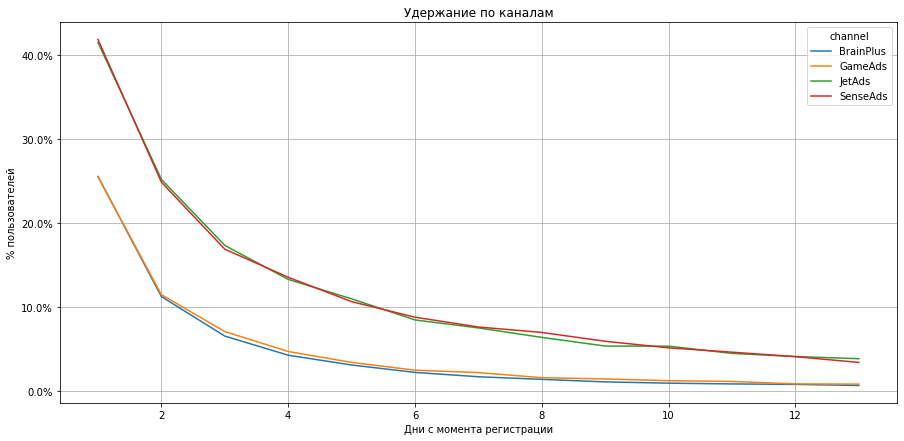

In [19]:
schedule = retention_channel.drop(columns = [0])
display(schedule.style.format('{:.2%}'))
ax = schedule.T.plot(figsize=(15,7), grid=True)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('Удержание по каналам'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('% пользователей');

Платящие пользователи дольше задержиаются в игре чем не платящие. Пользователи по регионам ведут себя одинаково. Удержание по устройствам также на одном уровне, что для android, что для iphone. Каналы Jetads и SenseAds показали наилучшие показатели чем более многочисленные каналы. Показатель кол-ва не гарантирует успех в удержании клиентов.

###  LTV и оцените окупаемость

In [20]:
ltv_raw = profile.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
ltv_raw['age'] = (ltv_raw['event_dt'] - ltv_raw['first_date']).dt.days
ltv_raw.query('payer == True')

,user_id,region,device,channel,first_date,payer,event_dt,revenue,age
58,--266505a_8d,Africa,Andoroid,BrainPlus,2020-05-30,True,2020-05-31,1.0,1.0
59,--266505a_8d,Africa,Andoroid,BrainPlus,2020-05-30,True,2020-06-04,1.0,5.0
60,--266505a_8d,Africa,Andoroid,BrainPlus,2020-05-30,True,2020-06-06,1.0,7.0
61,--266505a_8d,Africa,Andoroid,BrainPlus,2020-05-30,True,2020-06-14,1.0,15.0
62,--266505a_8d,Africa,Andoroid,BrainPlus,2020-05-30,True,2020-06-16,1.0,17.0
...,...,...,...,...,...,...,...,...,...
88673,fff60-20ddb0,CIS,Andoroid,JetAds,2020-05-02,True,2020-05-02,1.0,0.0
88674,fff60-20ddb0,CIS,Andoroid,JetAds,2020-05-02,True,2020-05-20,NaN,18.0
88675,fff60-20ddb0,CIS,Andoroid,JetAds,2020-05-02,True,2020-05-21,1.0,19.0
88676,fff60-20ddb0,CIS,Andoroid,JetAds,2020-05-02,True,2020-05-22,1.0,20.0


In [21]:
ltv_channel = ltv_raw.query('age <= 13').pivot_table(index = 'channel', columns = 'age', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv_channel

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,
BrainPlus,199.0,125.0,83.0,83.0,76.0,71.0,56.0,50.0,49.0,39.0,37.0,37.0,48.0,42.0
GameAds,153.0,107.0,72.0,73.0,71.0,59.0,56.0,42.0,41.0,48.0,28.0,30.0,20.0,30.0
JetAds,174.0,118.0,111.0,96.0,80.0,93.0,56.0,56.0,64.0,45.0,44.0,56.0,46.0,45.0
SenseAds,107.0,63.0,71.0,53.0,45.0,42.0,35.0,36.0,40.0,46.0,33.0,28.0,26.0,24.0


In [22]:
# Трансформируем таблицу выручки в таблицу накопительной выручки
ltv_channel = ltv_channel.cumsum(axis = 1)
ltv_channel

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,
BrainPlus,199.0,324.0,407.0,490.0,566.0,637.0,693.0,743.0,792.0,831.0,868.0,905.0,953.0,995.0
GameAds,153.0,260.0,332.0,405.0,476.0,535.0,591.0,633.0,674.0,722.0,750.0,780.0,800.0,830.0
JetAds,174.0,292.0,403.0,499.0,579.0,672.0,728.0,784.0,848.0,893.0,937.0,993.0,1039.0,1084.0
SenseAds,107.0,170.0,241.0,294.0,339.0,381.0,416.0,452.0,492.0,538.0,571.0,599.0,625.0,649.0


In [23]:
# Расчитаем размеры когорт
cohort_size_channel = profile.groupby('channel').agg({'user_id': 'nunique'})
cohort_size_channel.columns = ['cohort_size']
cohort_size_channel

,cohort_size
channel,
BrainPlus,45885
GameAds,19733
JetAds,12331
SenseAds,5236


In [24]:
report_channel = cohort_size_channel.merge(ltv_channel, on = 'channel')
report_channel

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
BrainPlus,45885,199.0,324.0,407.0,490.0,566.0,637.0,693.0,743.0,792.0,831.0,868.0,905.0,953.0,995.0
GameAds,19733,153.0,260.0,332.0,405.0,476.0,535.0,591.0,633.0,674.0,722.0,750.0,780.0,800.0,830.0
JetAds,12331,174.0,292.0,403.0,499.0,579.0,672.0,728.0,784.0,848.0,893.0,937.0,993.0,1039.0,1084.0
SenseAds,5236,107.0,170.0,241.0,294.0,339.0,381.0,416.0,452.0,492.0,538.0,571.0,599.0,625.0,649.0


In [25]:
# Расчитаем LTV, поделив столбцы выручки на столбец размеро когорт
report_channel = report_channel.div(report_channel['cohort_size'], axis = 0)
report_channel

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
BrainPlus,1.0,0.004337,0.007061,0.008870,0.010679,0.012335,0.013883,0.015103,0.016193,0.017261,0.018110,0.018917,0.019723,0.020769,0.021685
GameAds,1.0,0.007754,0.013176,0.016825,0.020524,0.024122,0.027112,0.029950,0.032078,0.034156,0.036588,0.038007,0.039528,0.040541,0.042062
JetAds,1.0,0.014111,0.023680,0.032682,0.040467,0.046955,0.054497,0.059038,0.063580,0.068770,0.072419,0.075987,0.080529,0.084259,0.087909
SenseAds,1.0,0.020435,0.032468,0.046028,0.056150,0.064744,0.072765,0.079450,0.086325,0.093965,0.102750,0.109053,0.114400,0.119366,0.123950


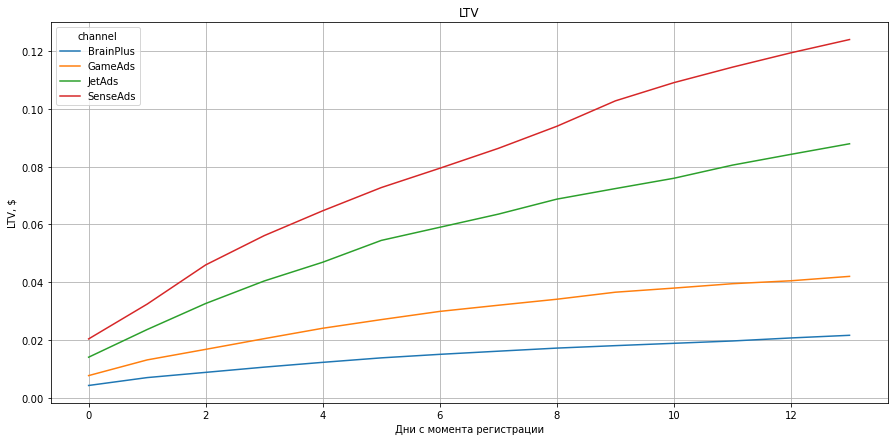

In [26]:
# построю кривую ltv
report_channel.drop(columns = 'cohort_size').T.plot(figsize=(15,7), grid = True)
plt.title('LTV'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('LTV, $');

               cohort_size
region                    
Africa                7490
Australia             4690
CIS                  12943
CN                   16314
Europe               11566
North America        14124
SEA                   6223
South America         9835


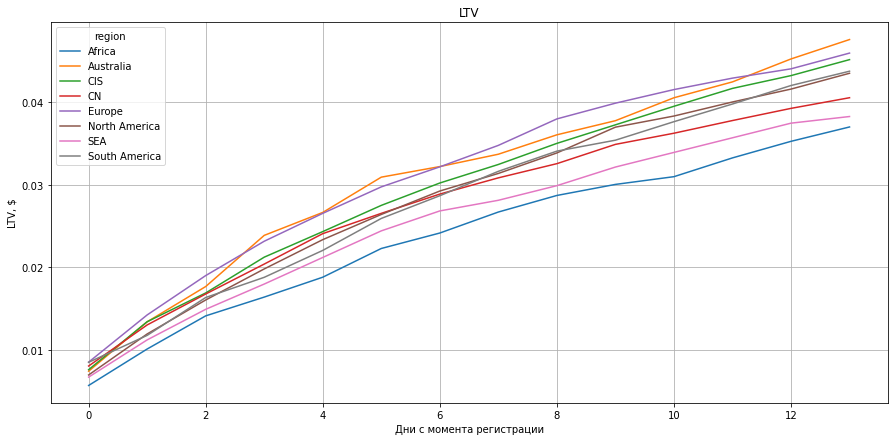

In [27]:
# ltv по регионам
ltv_reg = ltv_raw.query('age <= 13').pivot_table(index = 'region', columns = 'age', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv_reg = ltv_reg.cumsum(axis = 1)

# Расчитаем размеры когорт
cohort_size_reg = profile.groupby('region').agg({'user_id': 'nunique'})
cohort_size_reg.columns = ['cohort_size']
print(cohort_size_reg)

report_reg = cohort_size_reg.merge(ltv_reg, on = 'region')
report_reg = report_reg.div(report_reg['cohort_size'], axis = 0)

# построю кривую ltv
report_reg.drop(columns = 'cohort_size').T.plot(figsize=(15,7), grid = True)
plt.title('LTV'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('LTV, $');

          cohort_size
device               
Andoroid        58216
iPhone          24969


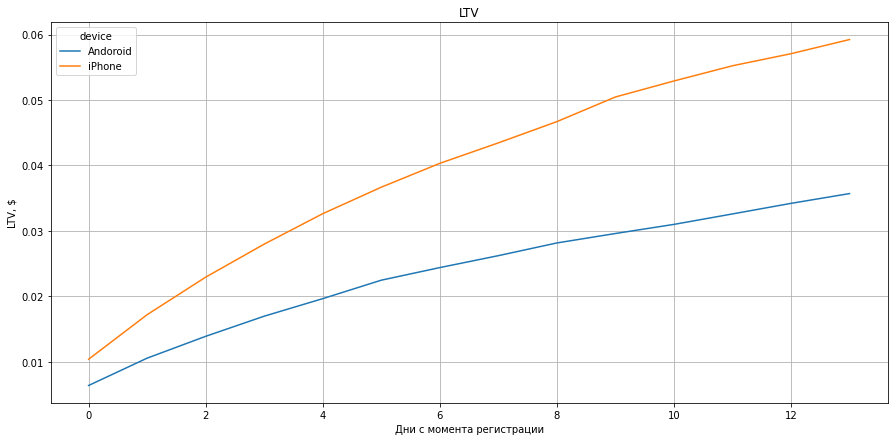

In [28]:
# ltv по устройствам
ltv_dev = ltv_raw.query('age <= 13').pivot_table(index = 'device', columns = 'age', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv_dev = ltv_dev.cumsum(axis = 1)

# Расчитаем размеры когорт
cohort_size_dev = profile.groupby('device').agg({'user_id': 'nunique'})
cohort_size_dev.columns = ['cohort_size']
print(cohort_size_dev)

report_dev = cohort_size_dev.merge(ltv_dev, on = 'device')
report_dev = report_dev.div(report_dev['cohort_size'], axis = 0)

# построю кривую ltv
report_dev.drop(columns = 'cohort_size').T.plot(figsize=(15,7), grid = True)
plt.title('LTV'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('LTV, $');

In [29]:
# средняя цена привлечения CAC 


# расчитываем общие затраты 
cac_channel = costs.groupby('channel').agg({'costs': 'sum'})
cac_channel.columns = ['ad_costs']
cac_channel

,ad_costs
channel,
BrainPlus,1626.600
GameAds,685.615
JetAds,1186.200
SenseAds,190.200


In [30]:
all_cac_channel = cohort_size_channel.merge(cac_channel, on = 'channel').merge(ltv_channel, on = 'channel')
all_cac_channel = all_cac_channel.div(all_cac_channel['cohort_size'], axis = 0)
all_cac_channel = all_cac_channel.rename(columns = {'ad_costs': 'cac'})
all_cac_channel

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
BrainPlus,1.0,0.035449,0.004337,0.007061,0.008870,0.010679,0.012335,0.013883,0.015103,0.016193,0.017261,0.018110,0.018917,0.019723,0.020769,0.021685
GameAds,1.0,0.034745,0.007754,0.013176,0.016825,0.020524,0.024122,0.027112,0.029950,0.032078,0.034156,0.036588,0.038007,0.039528,0.040541,0.042062
JetAds,1.0,0.096197,0.014111,0.023680,0.032682,0.040467,0.046955,0.054497,0.059038,0.063580,0.068770,0.072419,0.075987,0.080529,0.084259,0.087909
SenseAds,1.0,0.036325,0.020435,0.032468,0.046028,0.056150,0.064744,0.072765,0.079450,0.086325,0.093965,0.102750,0.109053,0.114400,0.119366,0.123950


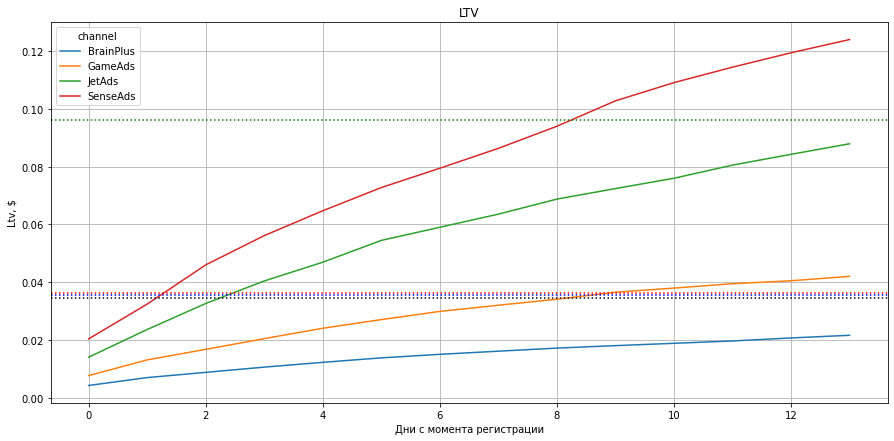

In [31]:
all_cac_channel.drop(columns = ['cohort_size', 'cac']).T.plot(figsize=(15,7), grid = True)
plt.title('LTV'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('Ltv, $')

palette_channel = {'BrainPlus': 'blue', 'GameAds': 'black', 'JetAds': 'green',
                   'SenseAds': 'red'}
for acq_channel, cac_value in all_cac_channel[['cac']].iterrows():
    plt.axhline(cac_value['cac'], linestyle = ':', color = palette_channel[acq_channel])

In [32]:
# ROI окупаемость инвестиций
all_cac_channel = all_cac_channel.div(all_cac_channel['cac'], axis = 0).drop(columns = ['cohort_size', 'cac'])
all_cac_channel.style.format('{:.2%}')

,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000
channel,,,,,,,,,,,,,,
BrainPlus,12.23%,19.92%,25.02%,30.12%,34.80%,39.16%,42.60%,45.68%,48.69%,51.09%,53.36%,55.64%,58.59%,61.17%
GameAds,22.32%,37.92%,48.42%,59.07%,69.43%,78.03%,86.20%,92.33%,98.31%,105.31%,109.39%,113.77%,116.68%,121.06%
JetAds,14.67%,24.62%,33.97%,42.07%,48.81%,56.65%,61.37%,66.09%,71.49%,75.28%,78.99%,83.71%,87.59%,91.38%
SenseAds,56.26%,89.38%,126.71%,154.57%,178.23%,200.32%,218.72%,237.64%,258.68%,282.86%,300.21%,314.93%,328.60%,341.22%


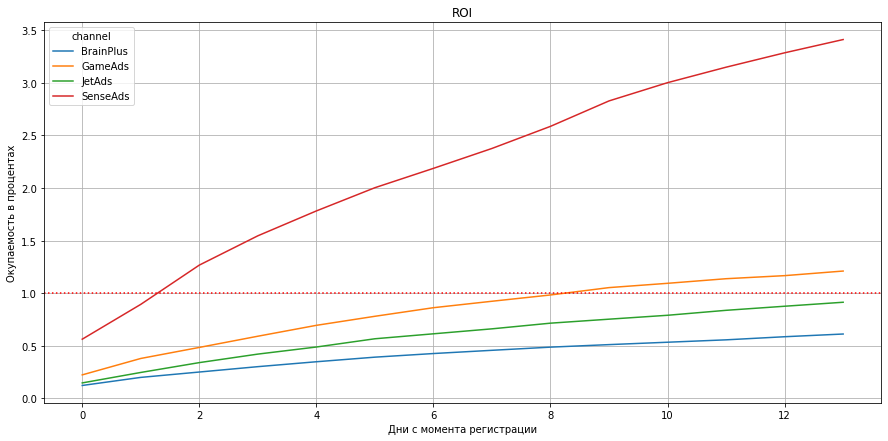

In [33]:
all_cac_channel.T.plot(figsize=(15,7), grid=True)
plt.axhline(1, linestyle = ':', color = 'red')
plt.title('ROI'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('Окупаемость в процентах');

In [34]:
profile.pivot_table(index = 'channel', columns = 'device', values = 'user_id', aggfunc = 'nunique').fillna(0)

device,Andoroid,iPhone
channel,,
BrainPlus,45885.0,0.0
GameAds,0.0,19733.0
JetAds,12331.0,0.0
SenseAds,0.0,5236.0


In [35]:
profile.pivot_table(index = 'channel', columns = 'region', values = 'user_id', aggfunc = 'nunique').fillna(0)

region,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
channel,,,,,,,,
BrainPlus,5511,2723,7272,11483,3680,4675,3722,6819
GameAds,416,932,2898,1362,5463,6561,1198,903
JetAds,1471,777,1986,3065,972,1202,1012,1846
SenseAds,92,258,787,404,1451,1686,291,267


Окупаемость инвестиций канала SenseAds в 3 раза, также окупился GameAds канал, остальные же каналы не окупились. Цена привлечения у канала JetAds самая высокая, а самая низкая у канала Gameads. Australia и Europe монетизация этих регионов болле высокая чем остальных, аутсайдер по регионам является Africa и SEA. Монетизация пользователей с iphone почти в 2 раза больще чем с android. Также по графику видно, что канал BrainPlus единственный не окупается за 14 дней.

### Автоматизация расчетов

In [36]:
# функция для расчета удержания, сколько пользователей продолжают пользоваться продуктом через заданныйпромежуток времени после регистрации.
def calculate_retention_(profile, session, dimension:str):
    
    # объединение двух дата фреймов
    retention_raw = profile.merge(session[['user_id', 'session_start']], on = 'user_id', how = 'left')
    retention_raw['age'] = (retention_raw['session_start'] - retention_raw['first_date']).dt.days # расчет дней с момента первого входа
    
    # сводная таблица удержаний, первые 14 дней 
    retention = retention_raw.query('age <= 13').pivot_table(index = dimension, columns = 'age', values = 'user_id', aggfunc = 'nunique').fillna(0)
    retention = retention.div(retention[0], axis = 0) # деление построчное
    
    # строим кривую удержания
    report = retention.drop(columns = [0])
    ax = report.T.plot(figsize=(15,7), grid=True) # транспонируем и строим график
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1)) # отображение в процентах 
    plt.title('Удержание'), plt.xlabel('Дни с момента регистрации'), plt.ylabel(' % пользователей')
    plt.show()
    
    return retention.drop(columns = [0])

In [37]:
# функция для расчета LTV, средняя выручка с пользователяза "время жизни"
def calculate_ltv_(profile, purchases, dimension:str):
    
    # присоединение к пользователям их покупок
    ltv_raw = profile.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
    # для каждого пользователя найдем время жизни пользователя в продукте
    ltv_raw['age'] = (ltv_raw['event_dt'] - ltv_raw['first_date']).dt.days
    
    # сводная таблица выручки
    ltv = ltv_raw.query('age <= 13').pivot_table(index = dimension, columns = 'age', values = 'revenue', aggfunc = 'sum').fillna(0)
    ltv = ltv.cumsum(axis = 1) # Трансформируем таблицу выручки в таблицу накопительной выручки, cumsum позволяет посчитать сумму с накоплением для каждой строки
    
    # расчет размеров когорт
    cohort_sizes = profile.groupby(dimension).agg({'user_id': 'nunique'})
    cohort_sizes.columns = ['cohort_size']
    
    # Добавим размеры когорт к накопительной выручке
    report = cohort_sizes.merge(ltv, on = dimension)
    report = report.div(report['cohort_size'], axis = 0) # Расчитаем LTV, поделив столбцы выручки на столбец размер когорт
    
    # проверка, можно ли посчитать окупаемость инвестиций, ROI
    if dimension == 'channel':
        
        # считаю Общие затраты
        cac = costs.groupby(dimension).agg({'costs' : 'sum'})
        cac.columns = ['ad_costs']
        
        # расчитываю cac для каждого канала, средняя цена привлечения.
        report = cohort_sizes.merge(cac, on = 'channel')
        report['cac'] = report['ad_costs'] / report['cohort_size']
        
        # Соединим размеры когорт, выручку с накоплением и общие затраты в одну таблицу:
        report = cohort_sizes.merge(cac, on = dimension).merge(ltv, on = dimension)
        
        # делим все на размер когорт, столбец затрат превратится в CAC, а столбцы дней жизнипревратятся в LTV
        report = report.div(report['cohort_size'], axis = 0)
        report = report.rename(columns = {'ad_costs': 'cac'})
        # расчитываем ROI по формуле: деление столбцов LTV на CAC
        report = report.div(report['cac'], axis = 0).drop(columns = ['cohort_size', 'cac'])

        # построение графика ROI
        report.T.plot(figsize=(15,7), grid = True)
        plt.axhline(1, linestyle = ':', color = 'red') # единый уровень окупаемости - линия, соответствует 100 %
        plt.title('ROI'), plt.xlabel('Дни с момента регистрации'), plt.ylabel('Окупаемость, %')
        
        return report
        
    else:    
        
        # построение графика LTV
        report.drop(columns = 'cohort_size').T.plot(figsize=(15,7), grid = True)
        plt.title('LTV'), plt.xlabel('Дни с момента ругистрации'), plt.ylabel('LTV, $')
    
    return report.drop(columns = 'cohort_size')

,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000
device,,,,,,,,,,,,,,
Andoroid,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.04
iPhone,0.01,0.02,0.02,0.03,0.03,0.04,0.04,0.04,0.05,0.05,0.05,0.06,0.06,0.06


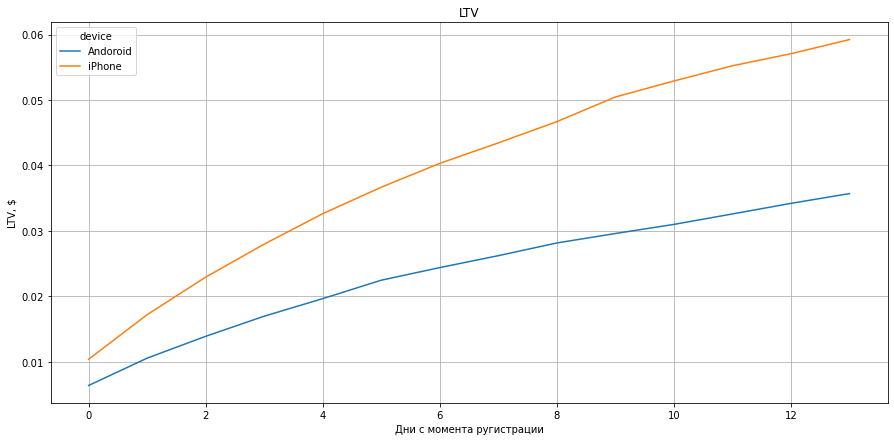

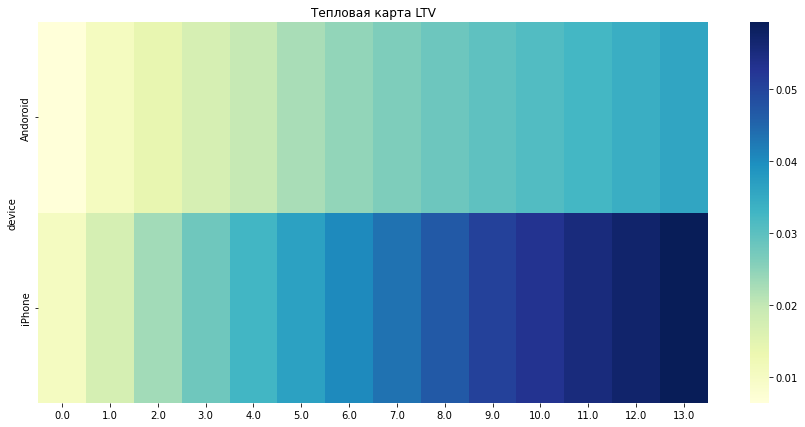

In [38]:
ltv = calculate_ltv_(profile, purchases, 'device')
display(ltv.style.format('{:.2f}'))

plt.figure(figsize = (15, 7))
sns.heatmap(ltv, cmap = 'YlGnBu')
plt.title('Тепловая карта LTV');

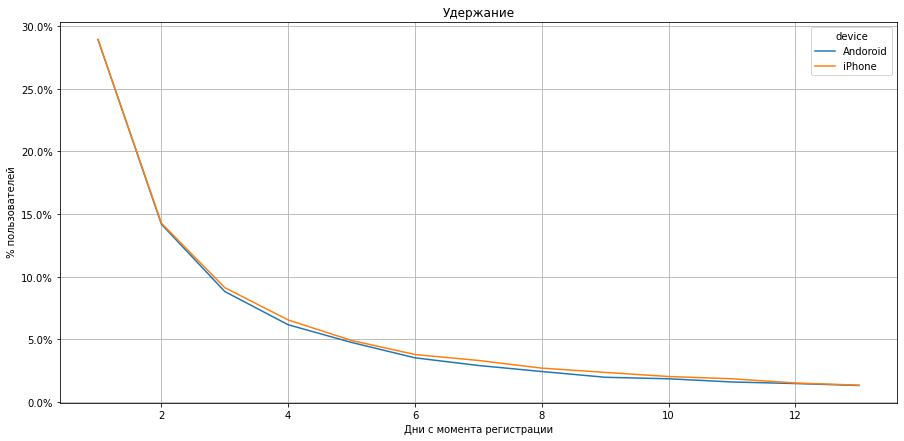

age,1,2,3,4,5,6,7,8,9,10,11,12,13
device,,,,,,,,,,,,,
Andoroid,28.92%,14.20%,8.82%,6.17%,4.76%,3.54%,2.93%,2.45%,1.99%,1.87%,1.61%,1.49%,1.33%
iPhone,28.92%,14.28%,9.13%,6.56%,4.92%,3.80%,3.33%,2.72%,2.37%,2.05%,1.87%,1.53%,1.36%


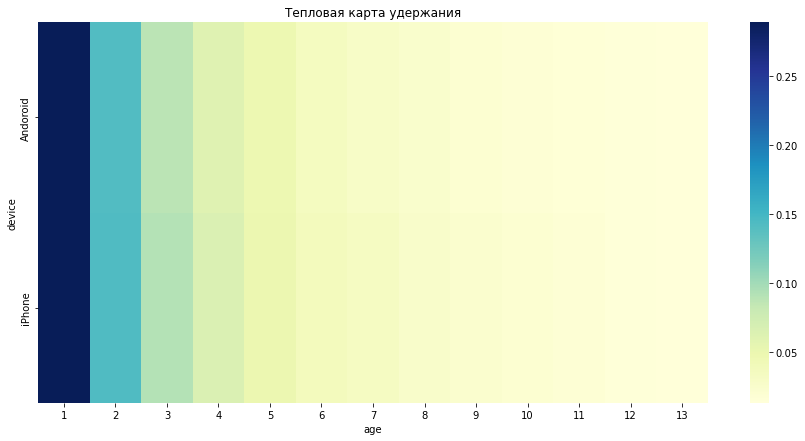

In [39]:
retention = calculate_retention_(profile, session, 'device')
display(retention.style.format('{:.2%}'))

plt.figure(figsize = (15, 7))
sns.heatmap(retention, cmap = "YlGnBu")
plt.title('Тепловая карта удержания');